## Download dataset

In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c widsdatathon2025

100% 246M/246M [00:05<00:00, 53.1MB/s]
100% 246M/246M [00:05<00:00, 43.6MB/s]


In [4]:
!mkdir wids25
!unzip /content/widsdatathon2025.zip -d wids25

Archive:  /content/widsdatathon2025.zip
  inflating: wids25/Data Dictionary.xlsx  
  inflating: wids25/SAMPLE_SUBMISSION.xlsx  
  inflating: wids25/TEST/TEST_CATEGORICAL.xlsx  
  inflating: wids25/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv  
  inflating: wids25/TEST/TEST_QUANTITATIVE_METADATA.xlsx  
  inflating: wids25/TRAIN/TRAINING_SOLUTIONS.xlsx  
  inflating: wids25/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx  
  inflating: wids25/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv  
  inflating: wids25/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx  


In [5]:
import os
for dirname, _, filenames in os.walk('/content/wids25'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/wids25/SAMPLE_SUBMISSION.xlsx
/content/wids25/Data Dictionary.xlsx
/content/wids25/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx
/content/wids25/TRAIN/TRAINING_SOLUTIONS.xlsx
/content/wids25/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv
/content/wids25/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx
/content/wids25/TEST/TEST_CATEGORICAL.xlsx
/content/wids25/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv
/content/wids25/TEST/TEST_QUANTITATIVE_METADATA.xlsx


## Import libraries and dataset

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
fcm_train = pd.read_csv('/content/wids25/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv')
fcm_train.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [8]:
fcm_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19901 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19900), object(1)
memory usage: 184.2+ MB


In [9]:
solution_train = pd.read_excel('/content/wids25/TRAIN/TRAINING_SOLUTIONS.xlsx')
solution_train.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [10]:
quant_train = pd.read_excel('/content/wids25/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx')
quant_train.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679


In [11]:
cat_train = pd.read_excel('/content/wids25/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx')
cat_train.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


## EDA

In [100]:
# Check for missing values in each dataset
print("\nMissing Values:")
print("Functional Connectome:", fcm_train.isnull().sum().sum())
print("Quantitative Metadata:", quant_train.isnull().sum())
print("Categorical Metadata:", cat_train.isnull().sum())
print("Training Solutions:", solution_train.isnull().sum())

# Align datasets by participant_id
# Check if all participant IDs in training_solutions are present in the other datasets
quant_ids = set(quant_train['participant_id'])
cat_ids = set(cat_train['participant_id'])
sol_ids = set(solution_train['participant_id'])

print("\nParticipant ID Alignment:")
print("IDs in Quantitative Metadata but not in Solutions:", quant_ids - sol_ids)
print("IDs in Categorical Metadata but not in Solutions:", cat_ids - sol_ids)
print("IDs in Solutions but not in Quantitative Metadata:", sol_ids - quant_ids)
print("IDs in Solutions but not in Categorical Metadata:", sol_ids - cat_ids)

# Align all datasets by intersecting participant IDs
common_ids = quant_ids & cat_ids & sol_ids
quant_train = quant_train[quant_train['participant_id'].isin(common_ids)]
cat_train = cat_train[cat_train['participant_id'].isin(common_ids)]
solution_train = solution_train[solution_train['participant_id'].isin(common_ids)]

print("\nAfter Alignment:")
print(f"Quantitative Metadata: {quant_train.shape}")
print(f"Categorical Metadata: {cat_train.shape}")
print(f"Training Solutions: {solution_train.shape}")


Missing Values:
Functional Connectome: 0
Quantitative Metadata: participant_id                  0
EHQ_EHQ_Total                   0
ColorVision_CV_Score            0
APQ_P_APQ_P_CP                  0
APQ_P_APQ_P_ID                  0
APQ_P_APQ_P_INV                 0
APQ_P_APQ_P_OPD                 0
APQ_P_APQ_P_PM                  0
APQ_P_APQ_P_PP                  0
SDQ_SDQ_Conduct_Problems        0
SDQ_SDQ_Difficulties_Total      0
SDQ_SDQ_Emotional_Problems      0
SDQ_SDQ_Externalizing           0
SDQ_SDQ_Generating_Impact       0
SDQ_SDQ_Hyperactivity           0
SDQ_SDQ_Internalizing           0
SDQ_SDQ_Peer_Problems           0
SDQ_SDQ_Prosocial               0
MRI_Track_Age_at_Scan         360
dtype: int64
Categorical Metadata: participant_id                       0
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site               0
PreInt_Demos_Fam_Child_Ethnicity    11
PreInt_Demos_Fam_Child_Race          0
MRI_Track_Scan_Location              0
Barratt_Barratt_P1_E

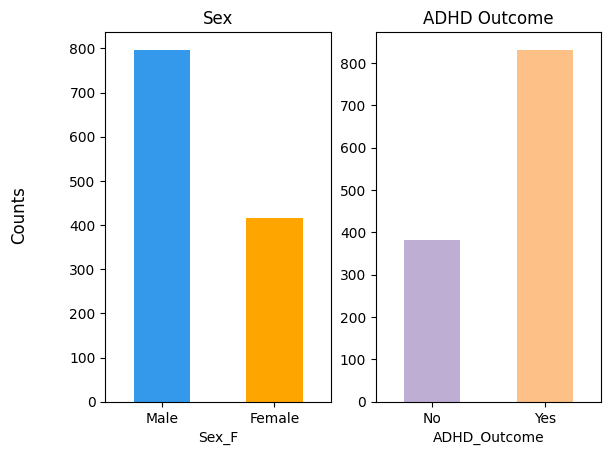

In [139]:
sex_df = solution_train['Sex_F'].value_counts().sort_index()
adhd_df = solution_train['ADHD_Outcome'].value_counts().sort_index()

sex_color = {'blue': '#3499eb', 'orange': '#FFA500'}
adhd_color = {'light_purple': '#beaed4', 'light_orange': '#fdc086'}
fig, (ax1, ax2) = plt.subplots(1, 2)

sex_df.plot(kind='bar', color=sex_color.values(), ax=ax1)
adhd_df.plot(kind='bar', color=adhd_color.values(), ax=ax2)

ax1.set_title('Sex')
ax2.set_title('ADHD Outcome')

ax1.set_xticks(ticks=range(2), labels=['Male', 'Female'], rotation=0)
ax2.set_xticks(ticks=range(2), labels=['No', 'Yes'], rotation=0)

fig.text(-0.01, 0.5, 'Counts', va='center', ha='center', rotation='vertical', fontsize=12)
plt.show()

### Quantitative

In [ ]:
quant_y_train = pd.merge(quant_train, solution_train, on = 'participant_id')
quant_y_train.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,...,1,5,0,5,1,0,10,NaN,1,1
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,...,6,8,7,8,10,4,5,NaN,1,0
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,...,2,8,5,7,6,4,9,8.239904,1,0
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,...,4,16,9,10,8,4,6,NaN,1,1
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,...,4,11,4,10,7,3,9,8.940679,1,1


In [ ]:
quant_y_train.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome,Sex_F
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,853.000000,1213.000000,1213.000000
mean,58.876917,13.164880,3.781533,13.205276,39.374279,17.785655,16.393240,25.246496,2.059357,12.122836,2.307502,7.557296,4.073372,5.497939,4.565540,2.258038,7.683430,11.245678,0.685078,0.342951
std,49.855501,2.780624,1.376700,3.811772,6.245928,3.764112,5.376994,3.950529,2.023322,6.577207,2.167549,4.166627,2.819731,2.836764,3.519634,2.090414,2.190295,3.234372,0.464676,0.474891
min,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.600000,14.000000,3.000000,11.000000,36.000000,16.000000,13.000000,23.000000,0.000000,7.000000,1.000000,4.000000,2.000000,4.000000,2.000000,0.000000,6.000000,8.803901,0.000000,0.000000
50%,76.670000,14.000000,3.000000,13.000000,40.000000,18.000000,16.000000,26.000000,2.000000,12.000000,2.000000,7.000000,4.000000,6.000000,4.000000,2.000000,8.000000,10.739219,1.000000,0.000000
75%,93.400000,14.000000,4.000000,16.000000,43.000000,20.000000,19.000000,28.000000,3.000000,17.000000,4.000000,10.000000,6.000000,8.000000,7.000000,4.000000,10.000000,13.460871,1.000000,1.000000
max,100.000000,14.000000,12.000000,28.000000,50.000000,28.000000,37.000000,30.000000,10.000000,34.000000,10.000000,20.000000,10.000000,10.000000,17.000000,9.000000,10.000000,21.564453,1.000000,1.000000


#### ? EHQ_EHQ_Total

Laterality Index (Score) indicates the prevalence of activation in one side of the brain over the other.

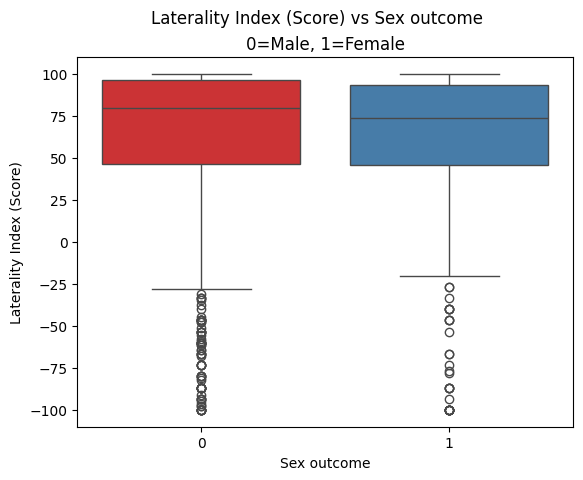

In [ ]:
plt.figure()
sns.boxplot(data=quant_y_train, x='Sex_F', hue='Sex_F', y='EHQ_EHQ_Total', palette='Set1', legend=False)
plt.suptitle('Laterality Index (Score) vs Sex outcome')
plt.title('0=Male, 1=Female')
plt.xlabel('Sex outcome')
plt.ylabel('Laterality Index (Score)')
plt.show()

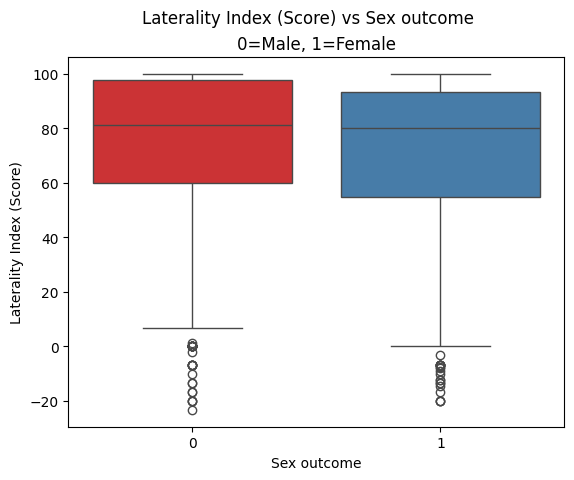

In [ ]:
# Remove outliers
# Calculate IQR
Q1 = quant_y_train['EHQ_EHQ_Total'].quantile(0.25)
Q3 = quant_y_train['EHQ_EHQ_Total'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = quant_y_train[(quant_y_train['EHQ_EHQ_Total'] >= lower_bound) & (quant_y_train['EHQ_EHQ_Total'] <= upper_bound)]

# Boxplot
plt.figure()
ax = sns.boxplot(data=df_filtered, x='Sex_F', hue='Sex_F', y='EHQ_EHQ_Total', palette='Set1', legend=False)
plt.suptitle('Laterality Index (Score) vs Sex outcome')
plt.title('0=Male, 1=Female')
plt.xlabel('Sex outcome')
plt.ylabel('Laterality Index (Score)')
plt.show()

This boxplot does not show any significant difference in terms of Laterality Index (Score) for ADHD outcome.

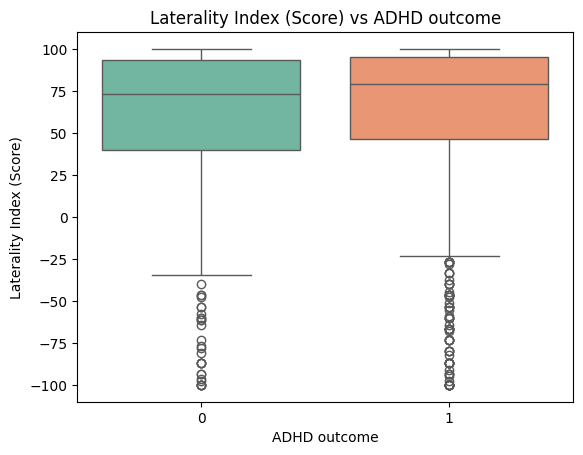

In [ ]:
plt.figure()
sns.boxplot(data=quant_y_train, x='ADHD_Outcome', hue='ADHD_Outcome', y='EHQ_EHQ_Total', palette='Set2', legend=False)
plt.title('Laterality Index (Score) vs ADHD outcome')
plt.suptitle('')
plt.xlabel('ADHD outcome')
plt.ylabel('Laterality Index (Score)')
plt.show()

<ipython-input-76-8e50520cb45a>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels=['No', 'Yes'])


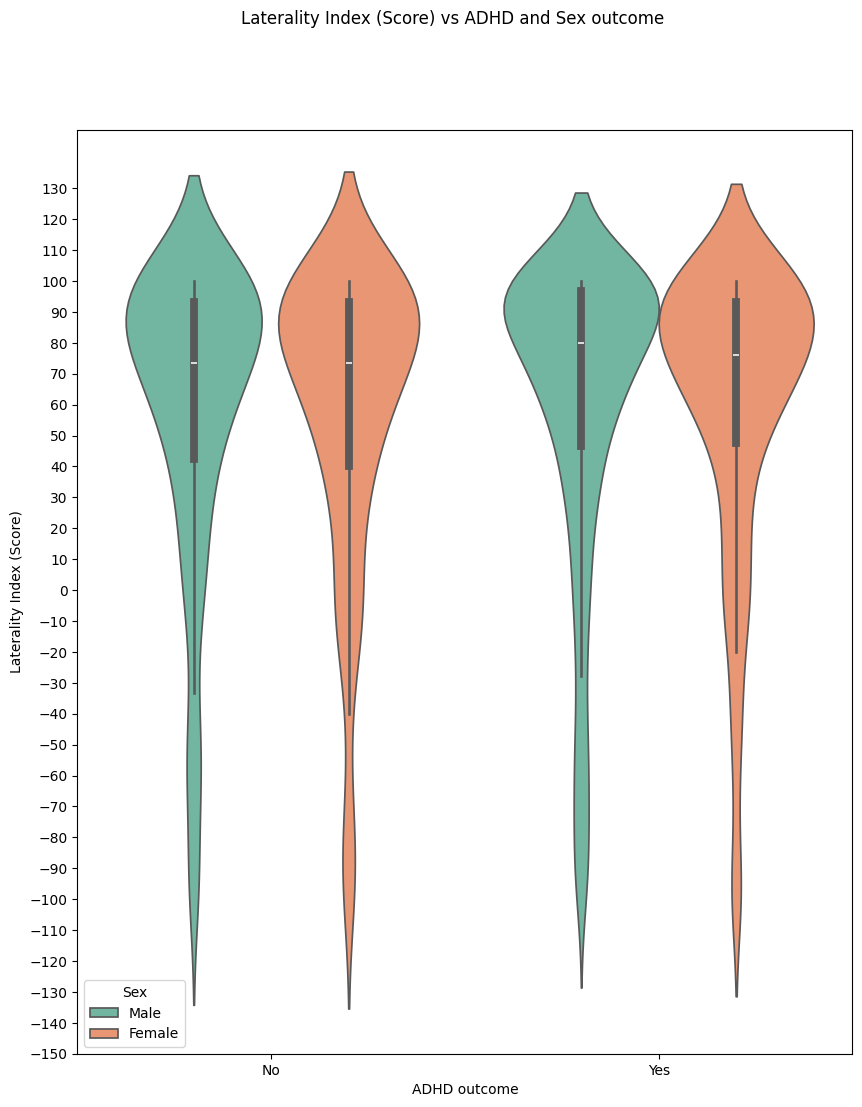

In [ ]:
plt.figure(figsize=(10, 12))
ax = sns.violinplot(data=quant_y_train, x='ADHD_Outcome', hue='Sex_F', y='EHQ_EHQ_Total', palette='Set2')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['Male', 'Female'], title='Sex')
ax.set(xticklabels=['No', 'Yes'])
ax.set(yticks=range(-150,140,10))

plt.suptitle('Laterality Index (Score) vs ADHD and Sex outcome')
plt.xlabel('ADHD outcome')
plt.ylabel('Laterality Index (Score)')

plt.show()

#### x ColorVision_CV_Score

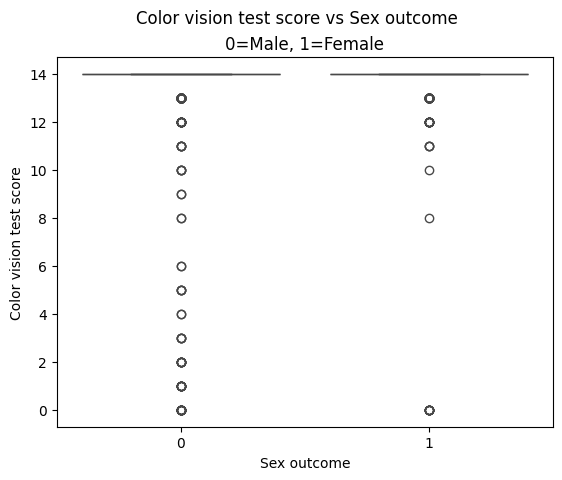

In [ ]:
plt.figure()
sns.boxplot(data=quant_y_train, x='Sex_F', hue='Sex_F', y='ColorVision_CV_Score', palette='Set1', legend=False)
plt.suptitle('Color vision test score vs Sex outcome')
plt.title('0=Male, 1=Female')
plt.xlabel('Sex outcome')
plt.ylabel('Color vision test score')
plt.show()

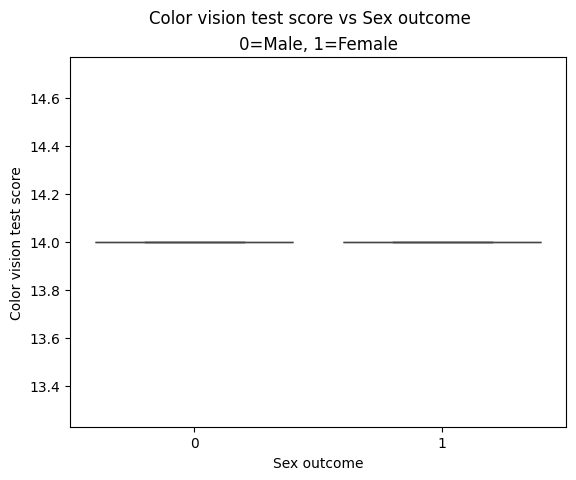

In [ ]:
# Remove outliers
# Calculate IQR
Q1 = quant_y_train['ColorVision_CV_Score'].quantile(0.25)
Q3 = quant_y_train['ColorVision_CV_Score'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = quant_y_train[(quant_y_train['ColorVision_CV_Score'] >= lower_bound) & (quant_y_train['ColorVision_CV_Score'] <= upper_bound)]

# Boxplot
plt.figure()
ax = sns.boxplot(data=df_filtered, x='Sex_F', hue='Sex_F', y='ColorVision_CV_Score', palette='Set1', legend=False)
plt.suptitle('Color vision test score vs Sex outcome')
plt.title('0=Male, 1=Female')
plt.xlabel('Sex outcome')
plt.ylabel('Color vision test score')
plt.show()

<ipython-input-80-25d6c26f33a3>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels=['No', 'Yes'])


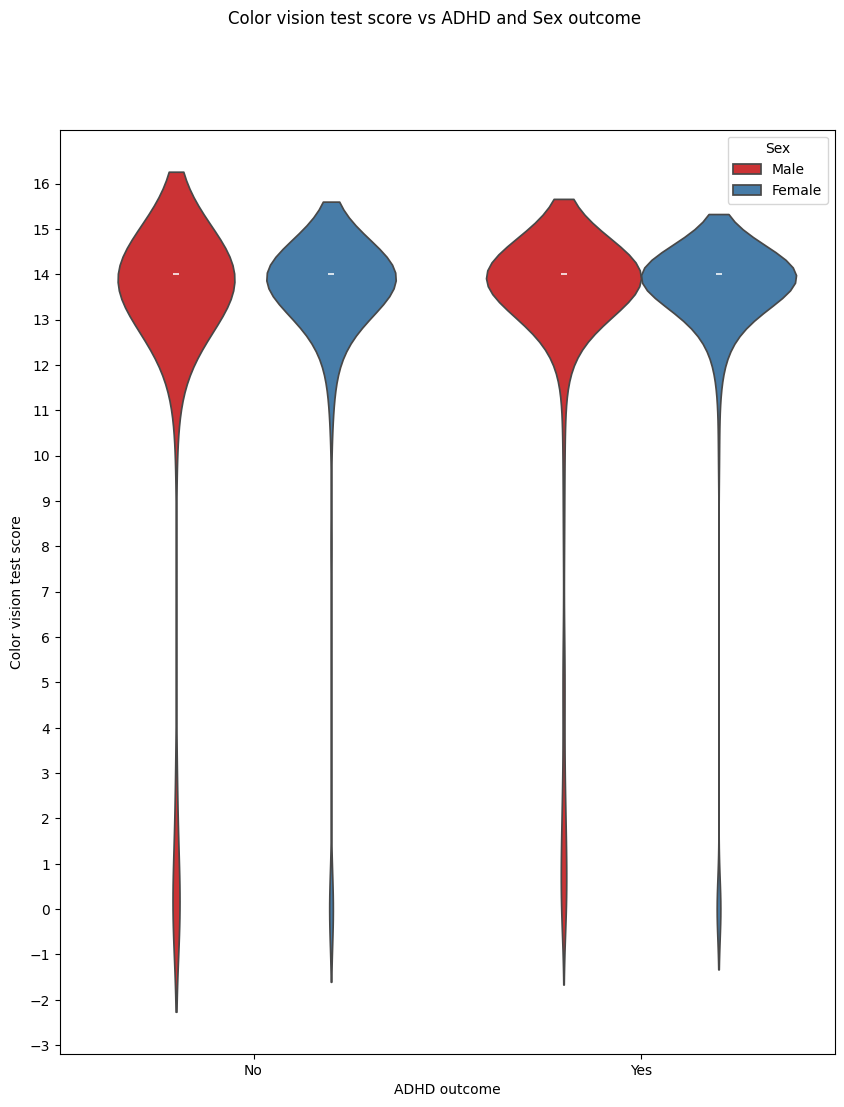

In [ ]:
plt.figure(figsize=(10, 12))
ax = sns.violinplot(data=quant_y_train, x='ADHD_Outcome', hue='Sex_F', y='ColorVision_CV_Score', palette='Set1')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['Male', 'Female'], title='Sex')
ax.set(xticklabels=['No', 'Yes'])
ax.set(yticks=range(-3,17,1))


plt.suptitle('Color vision test score vs ADHD and Sex outcome')
plt.xlabel('ADHD outcome')
plt.ylabel('Color vision test score')

plt.show()

#### APQ

APQ is a set of questions. Total score possible is `42 x 5 = 210`.

<ipython-input-88-ce5e8cfbec52>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels=['No', 'Yes'])


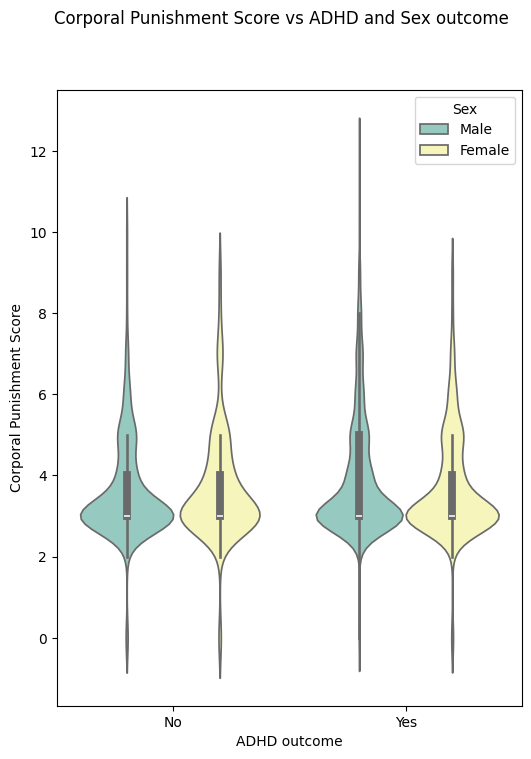

In [ ]:
plt.figure(figsize=(6, 8))
ax = sns.violinplot(data=quant_y_train, x='ADHD_Outcome', hue='Sex_F', y='APQ_P_APQ_P_CP', palette='Set3')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['Male', 'Female'], title='Sex')
ax.set(xticklabels=['No', 'Yes'])
ax.set(yticks=range(0,14,2))


plt.suptitle('Corporal Punishment Score vs ADHD and Sex outcome')
plt.xlabel('ADHD outcome')
plt.ylabel('Corporal Punishment Score')

plt.show()

<ipython-input-89-e86d434d4004>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels=['No', 'Yes'])


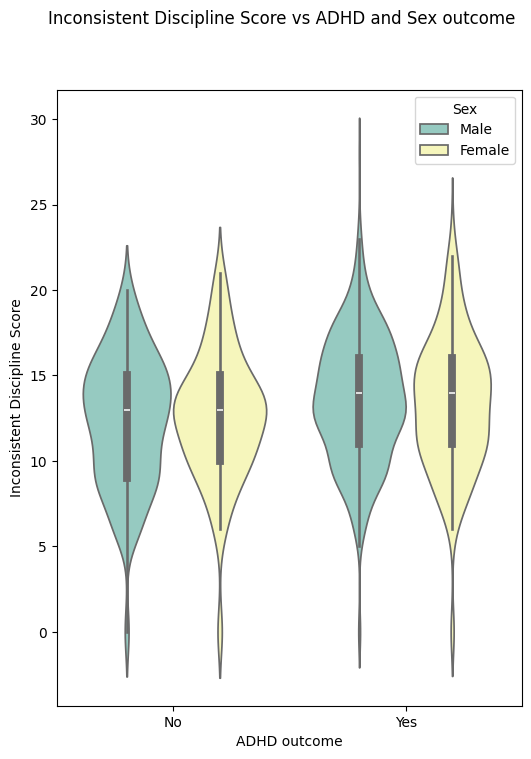

In [ ]:
plt.figure(figsize=(6, 8))
ax = sns.violinplot(data=quant_y_train, x='ADHD_Outcome', hue='Sex_F', y='APQ_P_APQ_P_ID', palette='Set3')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['Male', 'Female'], title='Sex')
ax.set(xticklabels=['No', 'Yes'])
# ax.set(yticks=range(0,14,2))


plt.suptitle('Inconsistent Discipline Score vs ADHD and Sex outcome')
plt.xlabel('ADHD outcome')
plt.ylabel('Inconsistent Discipline Score')

plt.show()

<ipython-input-90-61bad2f04fb5>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels=['No', 'Yes'])


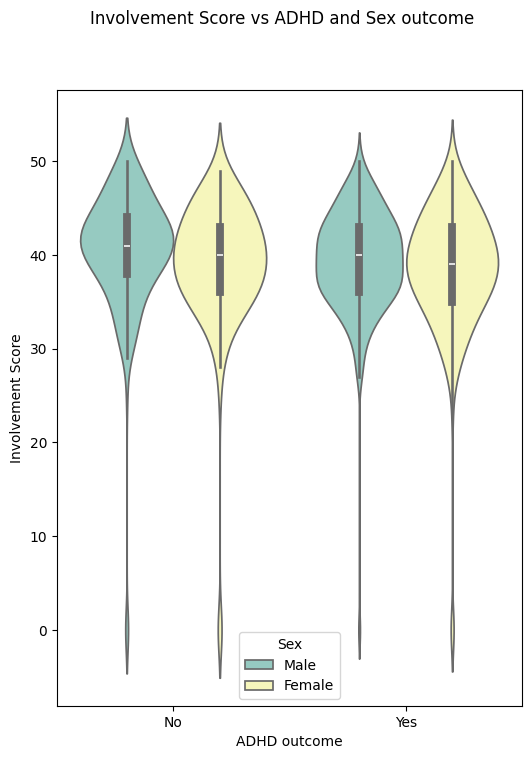

In [ ]:
plt.figure(figsize=(6, 8))
ax = sns.violinplot(data=quant_y_train, x='ADHD_Outcome', hue='Sex_F', y='APQ_P_APQ_P_INV', palette='Set3')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['Male', 'Female'], title='Sex')
ax.set(xticklabels=['No', 'Yes'])
# ax.set(yticks=range(0,14,2))


plt.suptitle('Involvement Score vs ADHD and Sex outcome')
plt.xlabel('ADHD outcome')
plt.ylabel('Involvement Score')

plt.show()

(Not factored into total score but provides item level information)

<ipython-input-93-821d57f733ea>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels=['No', 'Yes'])


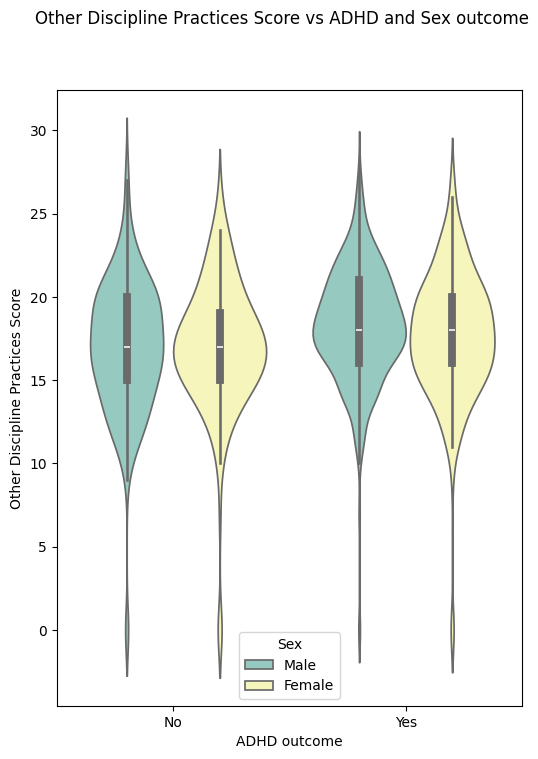

In [ ]:
plt.figure(figsize=(6, 8))
ax = sns.violinplot(data=quant_y_train, x='ADHD_Outcome', hue='Sex_F', y='APQ_P_APQ_P_OPD', palette='Set3')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['Male', 'Female'], title='Sex')
ax.set(xticklabels=['No', 'Yes'])
# ax.set(yticks=range(0,14,2))


plt.suptitle('Other Discipline Practices Score vs ADHD and Sex outcome')
plt.xlabel('ADHD outcome')
plt.ylabel('Other Discipline Practices Score')

plt.show()

<ipython-input-94-d3a7b4c94d0a>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels=['No', 'Yes'])


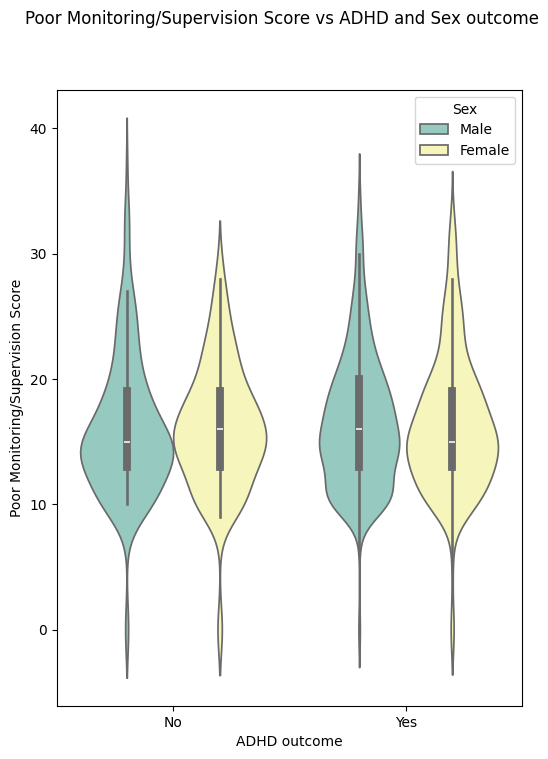

In [ ]:
plt.figure(figsize=(6, 8))
ax = sns.violinplot(data=quant_y_train, x='ADHD_Outcome', hue='Sex_F', y='APQ_P_APQ_P_PM', palette='Set3')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['Male', 'Female'], title='Sex')
ax.set(xticklabels=['No', 'Yes'])
# ax.set(yticks=range(0,14,2))


plt.suptitle('Poor Monitoring/Supervision Score vs ADHD and Sex outcome')
plt.xlabel('ADHD outcome')
plt.ylabel('Poor Monitoring/Supervision Score')

plt.show()

<ipython-input-95-e83ed0880170>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels=['No', 'Yes'])


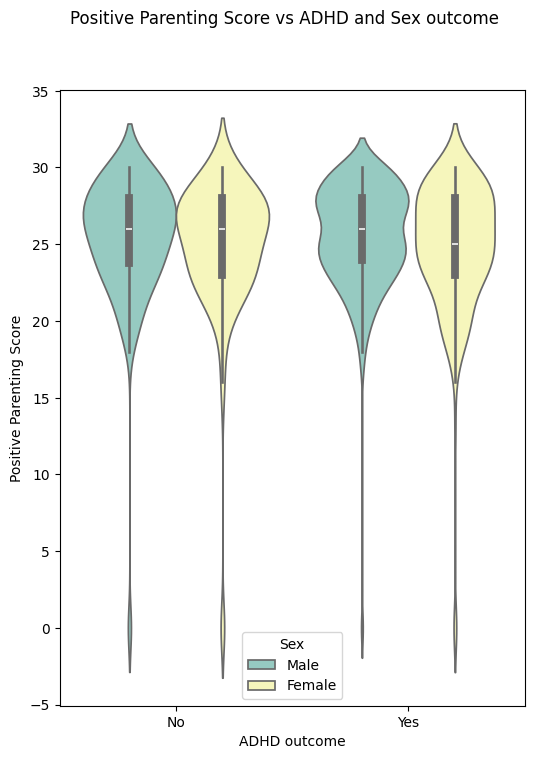

In [ ]:
plt.figure(figsize=(6, 8))
ax = sns.violinplot(data=quant_y_train, x='ADHD_Outcome', hue='Sex_F', y='APQ_P_APQ_P_PP', palette='Set3')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['Male', 'Female'], title='Sex')
ax.set(xticklabels=['No', 'Yes'])
# ax.set(yticks=range(0,14,2))


plt.suptitle('Positive Parenting Score vs ADHD and Sex outcome')
plt.xlabel('ADHD outcome')
plt.ylabel('Positive Parenting Score')

plt.show()

#### v SDQ

<ipython-input-109-c02dbbbc81a6>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels=['No', 'Yes'])


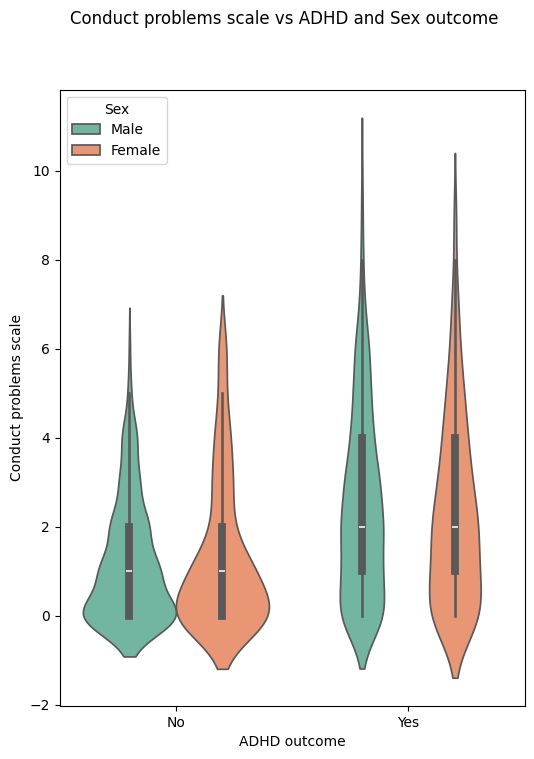

In [ ]:
plt.figure(figsize=(6, 8))
ax = sns.violinplot(data=quant_y_train, x='ADHD_Outcome', hue='Sex_F', y='SDQ_SDQ_Conduct_Problems', palette='Set2')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['Male', 'Female'], title='Sex')
ax.set(xticklabels=['No', 'Yes'])
# ax.set(yticks=range(0,14,2))


plt.suptitle('Conduct problems scale vs ADHD and Sex outcome')
plt.xlabel('ADHD outcome')
plt.ylabel('Conduct problems scale')

plt.show()

<ipython-input-110-a0fc6c4a8164>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels=['No', 'Yes'])


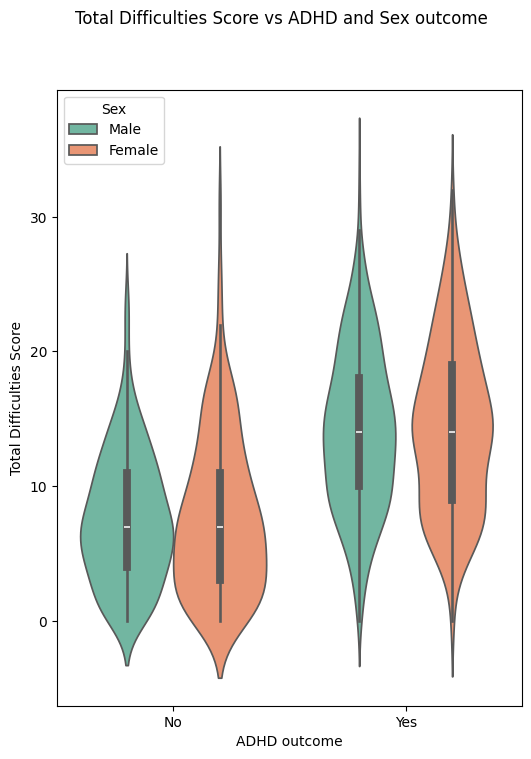

In [ ]:
plt.figure(figsize=(6, 8))
ax = sns.violinplot(data=quant_y_train, x='ADHD_Outcome', hue='Sex_F', y='SDQ_SDQ_Difficulties_Total', palette='Set2')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['Male', 'Female'], title='Sex')
ax.set(xticklabels=['No', 'Yes'])
# ax.set(yticks=range(0,14,2))


plt.suptitle('Total Difficulties Score vs ADHD and Sex outcome')
plt.xlabel('ADHD outcome')
plt.ylabel('Total Difficulties Score')

plt.show()

<ipython-input-111-d6b3ae746a62>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels=['No', 'Yes'])


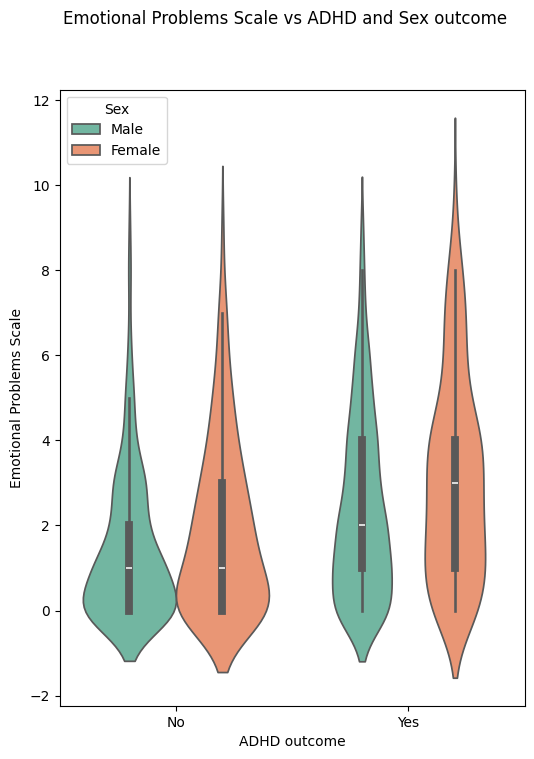

In [ ]:
plt.figure(figsize=(6, 8))
ax = sns.violinplot(data=quant_y_train, x='ADHD_Outcome', hue='Sex_F', y='SDQ_SDQ_Emotional_Problems', palette='Set2')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['Male', 'Female'], title='Sex')
ax.set(xticklabels=['No', 'Yes'])
# ax.set(yticks=range(0,14,2))


plt.suptitle('Emotional Problems Scale vs ADHD and Sex outcome')
plt.xlabel('ADHD outcome')
plt.ylabel('Emotional Problems Scale')

plt.show()

<ipython-input-112-050590da4a7e>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels=['No', 'Yes'])


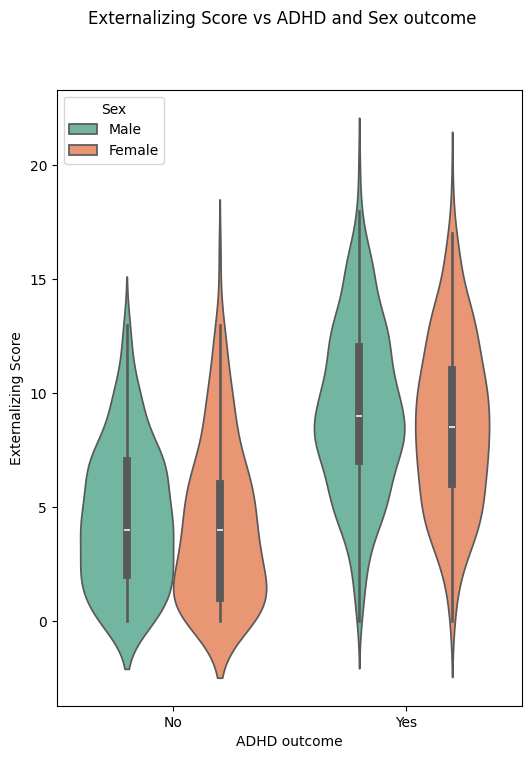

In [ ]:
plt.figure(figsize=(6, 8))
ax = sns.violinplot(data=quant_y_train, x='ADHD_Outcome', hue='Sex_F', y='SDQ_SDQ_Externalizing', palette='Set2')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['Male', 'Female'], title='Sex')
ax.set(xticklabels=['No', 'Yes'])
# ax.set(yticks=range(0,14,2))


plt.suptitle('Externalizing Score vs ADHD and Sex outcome')
plt.xlabel('ADHD outcome')
plt.ylabel('Externalizing Score')

plt.show()

<ipython-input-113-519c54d27a91>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels=['No', 'Yes'])


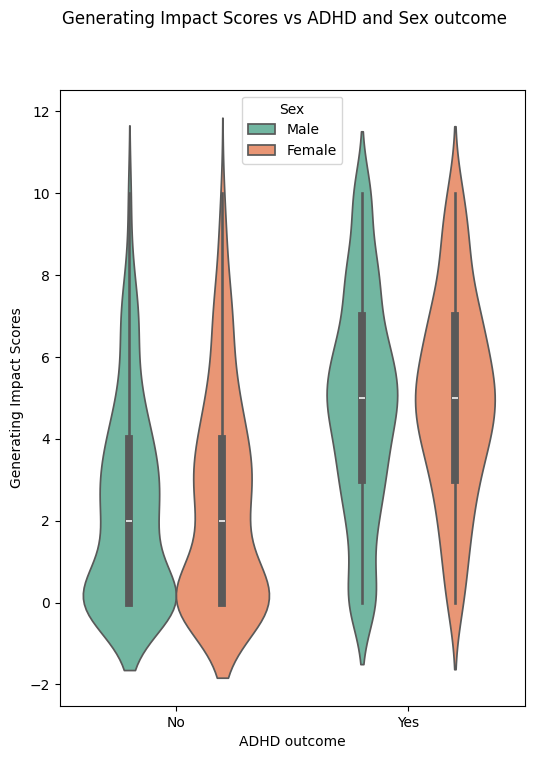

In [ ]:
plt.figure(figsize=(6, 8))
ax = sns.violinplot(data=quant_y_train, x='ADHD_Outcome', hue='Sex_F', y='SDQ_SDQ_Generating_Impact', palette='Set2')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['Male', 'Female'], title='Sex')
ax.set(xticklabels=['No', 'Yes'])
# ax.set(yticks=range(0,14,2))


plt.suptitle('Generating Impact Scores vs ADHD and Sex outcome')
plt.xlabel('ADHD outcome')
plt.ylabel('Generating Impact Scores')

plt.show()

<ipython-input-114-fb74900bcc6f>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels=['No', 'Yes'])


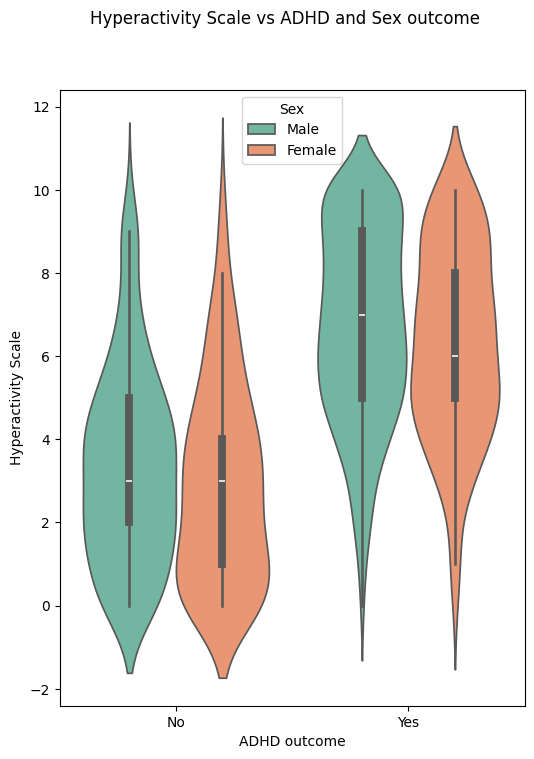

In [ ]:
plt.figure(figsize=(6, 8))
ax = sns.violinplot(data=quant_y_train, x='ADHD_Outcome', hue='Sex_F', y='SDQ_SDQ_Hyperactivity', palette='Set2')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['Male', 'Female'], title='Sex')
ax.set(xticklabels=['No', 'Yes'])
# ax.set(yticks=range(0,14,2))


plt.suptitle('Hyperactivity Scale vs ADHD and Sex outcome')
plt.xlabel('ADHD outcome')
plt.ylabel('Hyperactivity Scale')

plt.show()

<ipython-input-115-e1c6763c9ba8>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels=['No', 'Yes'])


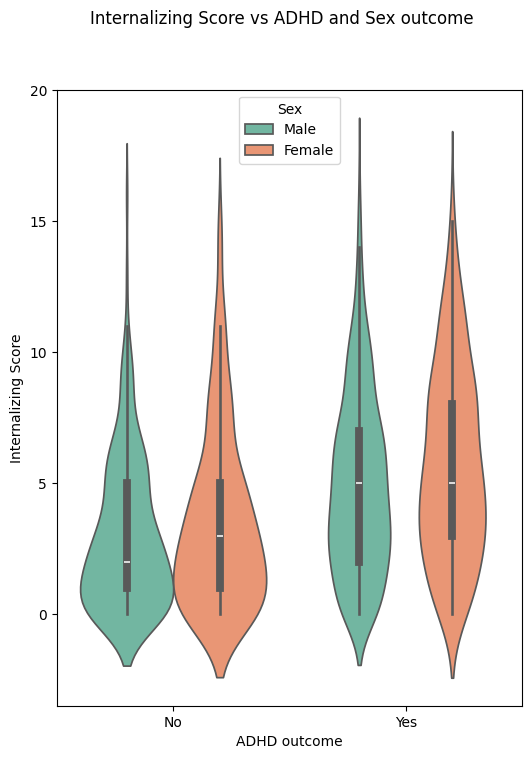

In [ ]:
plt.figure(figsize=(6, 8))
ax = sns.violinplot(data=quant_y_train, x='ADHD_Outcome', hue='Sex_F', y='SDQ_SDQ_Internalizing', palette='Set2')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['Male', 'Female'], title='Sex')
ax.set(xticklabels=['No', 'Yes'])
# ax.set(yticks=range(0,14,2))


plt.suptitle('Internalizing Score vs ADHD and Sex outcome')
plt.xlabel('ADHD outcome')
plt.ylabel('Internalizing Score')

plt.show()

<ipython-input-116-45bed232abbf>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels=['No', 'Yes'])


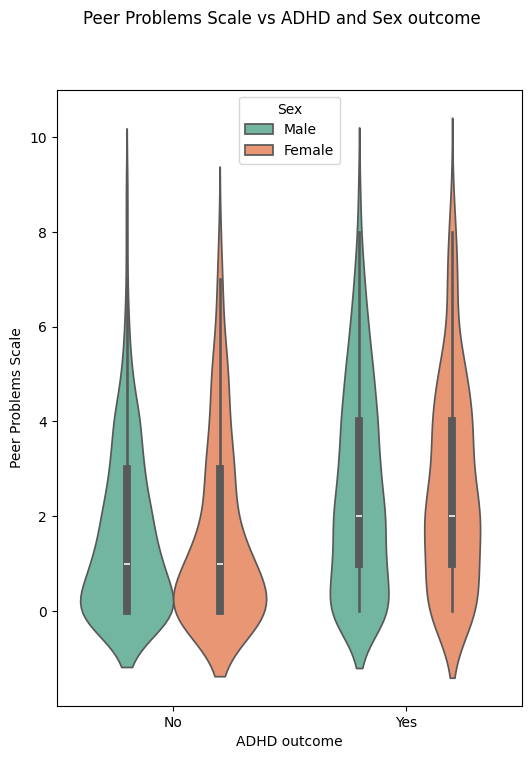

In [ ]:
plt.figure(figsize=(6, 8))
ax = sns.violinplot(data=quant_y_train, x='ADHD_Outcome', hue='Sex_F', y='SDQ_SDQ_Peer_Problems', palette='Set2')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['Male', 'Female'], title='Sex')
ax.set(xticklabels=['No', 'Yes'])
# ax.set(yticks=range(0,14,2))


plt.suptitle('Peer Problems Scale vs ADHD and Sex outcome')
plt.xlabel('ADHD outcome')
plt.ylabel('Peer Problems Scale')

plt.show()

<ipython-input-117-5d2d5304c98c>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels=['No', 'Yes'])


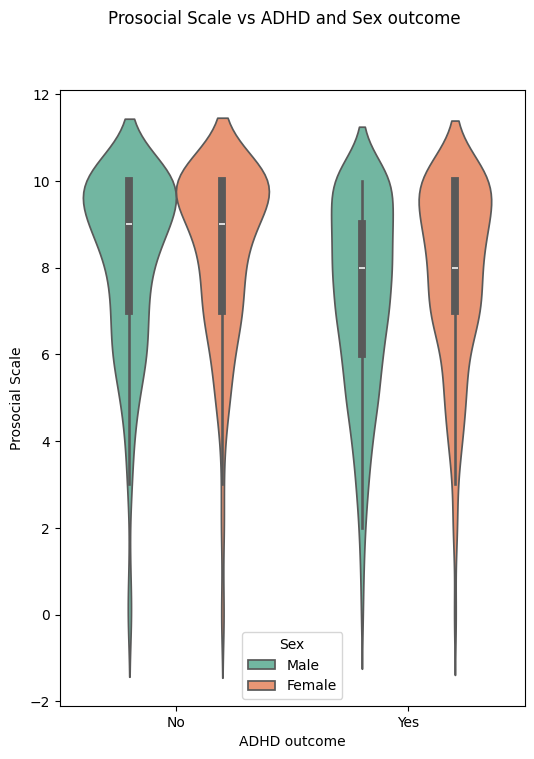

In [ ]:
plt.figure(figsize=(6, 8))
ax = sns.violinplot(data=quant_y_train, x='ADHD_Outcome', hue='Sex_F', y='SDQ_SDQ_Prosocial', palette='Set2')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['Male', 'Female'], title='Sex')
ax.set(xticklabels=['No', 'Yes'])
# ax.set(yticks=range(0,14,2))


plt.suptitle('Prosocial Scale vs ADHD and Sex outcome')
plt.xlabel('ADHD outcome')
plt.ylabel('Prosocial Scale')

plt.show()

#### MRI information

<ipython-input-107-c440d4d84df2>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels=['No', 'Yes'])


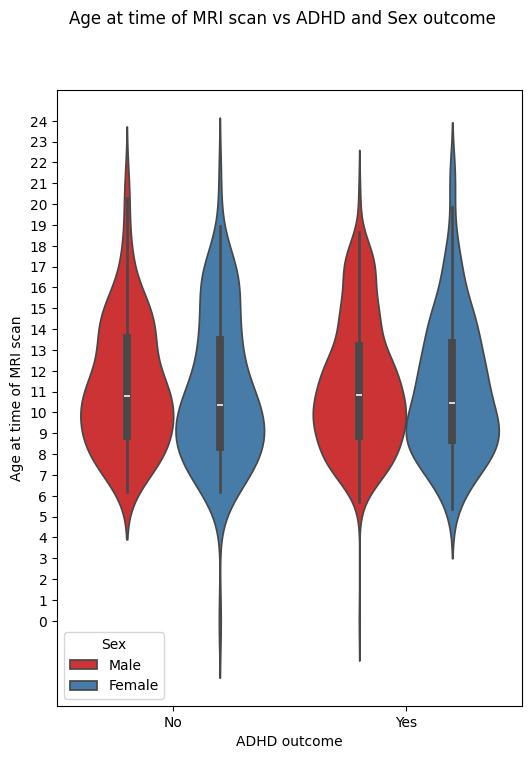

In [ ]:
plt.figure(figsize=(6, 8))
ax = sns.violinplot(data=quant_y_train, x='ADHD_Outcome', hue='Sex_F', y='MRI_Track_Age_at_Scan', palette='Set1')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['Male', 'Female'], title='Sex')
ax.set(xticklabels=['No', 'Yes'])
ax.set(yticks=range(0,25,1))


plt.suptitle('Age at time of MRI scan vs ADHD and Sex outcome')
plt.xlabel('ADHD outcome')
plt.ylabel('Age at time of MRI scan')

plt.show()

### Categorical

In [12]:
cat_y_train = pd.merge(cat_train, solution_train, on = 'participant_id')
cat_y_train.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45,1,1
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0,1,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0,1,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0,1,1
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0,1,1


In [14]:
cat_y_train.describe()

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,ADHD_Outcome,Sex_F
count,1213.000000,1213.000000,1202.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,2017.652102,2.014839,0.424293,2.080791,2.288541,17.641385,24.892828,14.122012,24.719703,0.685078,0.342951
std,1.122522,1.135147,0.687470,3.164636,0.758348,4.004639,17.025899,7.201023,17.171113,0.464676,0.474891
min,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,1.000000,0.000000,0.000000,2.000000,15.000000,0.000000,12.000000,5.000000,0.000000,0.000000
50%,2018.000000,1.000000,0.000000,0.000000,2.000000,18.000000,30.000000,18.000000,30.000000,1.000000,0.000000
75%,2019.000000,3.000000,1.000000,2.000000,3.000000,21.000000,40.000000,21.000000,40.000000,1.000000,1.000000
max,2020.000000,4.000000,3.000000,11.000000,4.000000,21.000000,45.000000,21.000000,45.000000,1.000000,1.000000


#### Demographics

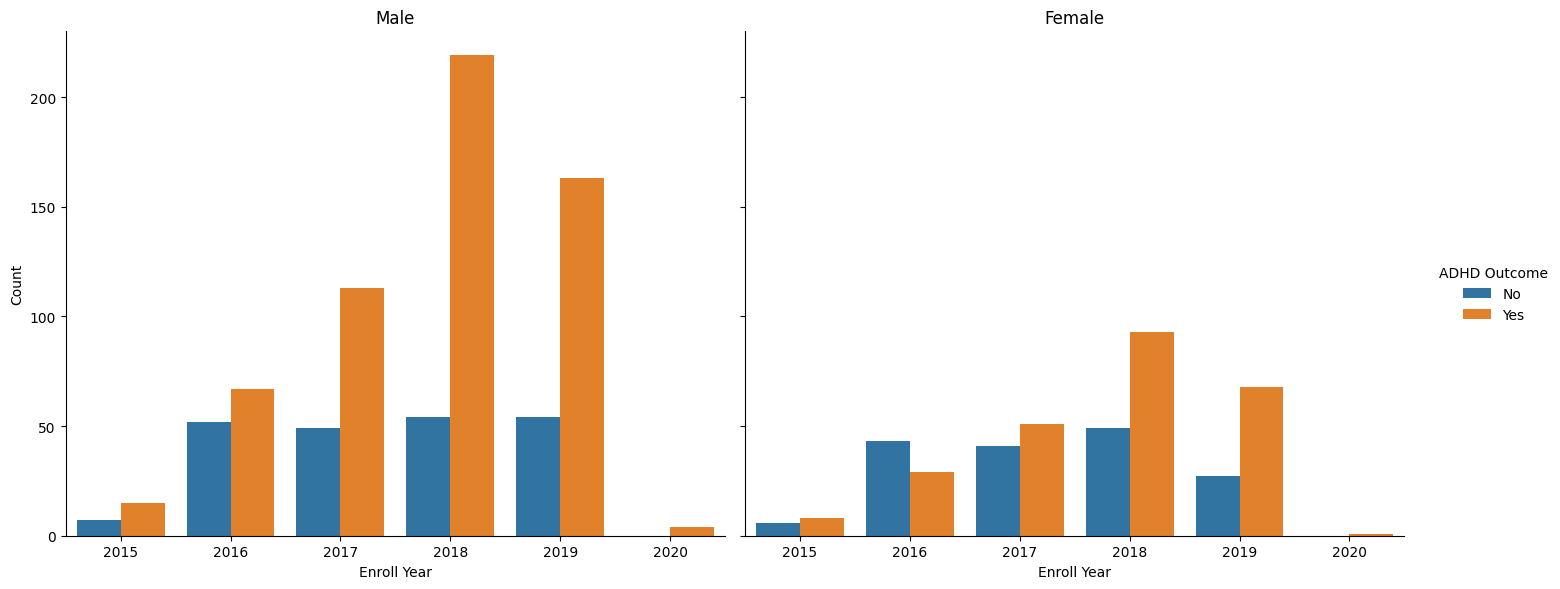

In [25]:
df = cat_y_train.groupby(['Basic_Demos_Enroll_Year', 'Sex_F'])['ADHD_Outcome'].value_counts().reset_index(name='Counts')

g = sns.catplot(
    data=df,
    x='Basic_Demos_Enroll_Year',
    y='Counts',
    hue='ADHD_Outcome',
    col='Sex_F',
    kind='bar',
    height=6,
    aspect=1.2
)

# Customize the titles for each subplot
new_titles = {0: 'Male', 1: 'Female'}
for ax, sex_f in zip(g.axes.flat, new_titles.keys()):
    ax.set_title(new_titles[sex_f])

# Customize the legend title and labels
g._legend.set_title('ADHD Outcome')
new_labels = ['No', 'Yes']
for t, label in zip(g._legend.texts, new_labels):
    t.set_text(label)

# Update axis labels and layout
g.set_axis_labels('Enroll Year', 'Count')

g.tight_layout()
plt.show()

<ipython-input-30-dc2db1753fcc>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks)
<ipython-input-30-dc2db1753fcc>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks)


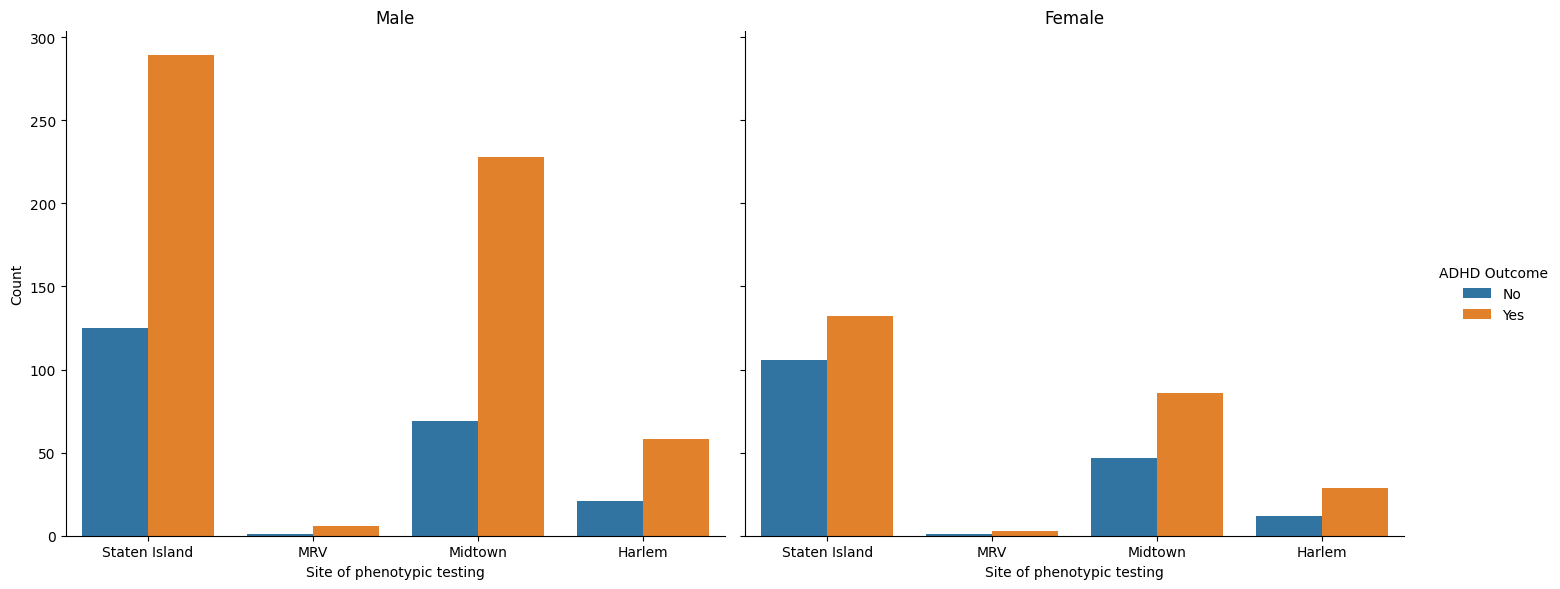

In [30]:
df = cat_y_train.groupby(['Basic_Demos_Study_Site', 'Sex_F'])['ADHD_Outcome'].value_counts().reset_index(name='Counts')

g = sns.catplot(
    data=df,
    x='Basic_Demos_Study_Site',
    y='Counts',
    hue='ADHD_Outcome',
    col='Sex_F',
    kind='bar',
    height=6,
    aspect=1.2
)

# Customize the titles for each subplot
new_titles = {0: 'Male', 1: 'Female'}
for ax, sex_f in zip(g.axes.flat, new_titles.keys()):
    ax.set_title(new_titles[sex_f])

# Customize the legend title and labels
g._legend.set_title('ADHD Outcome')
new_labels = ['No', 'Yes']
for t, label in zip(g._legend.texts, new_labels):
    t.set_text(label)

# Set custom x-tick labels
xticks = ['Staten Island', 'MRV', 'Midtown', 'Harlem', 'SI RUMC']
for ax in g.axes.flat:
    ax.set_xticklabels(xticks)

# Update axis labels and layout
g.set_axis_labels('Site of phenotypic testing', 'Count')

g.tight_layout()
plt.show()

<ipython-input-31-ae5d538feac6>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks)
<ipython-input-31-ae5d538feac6>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks)


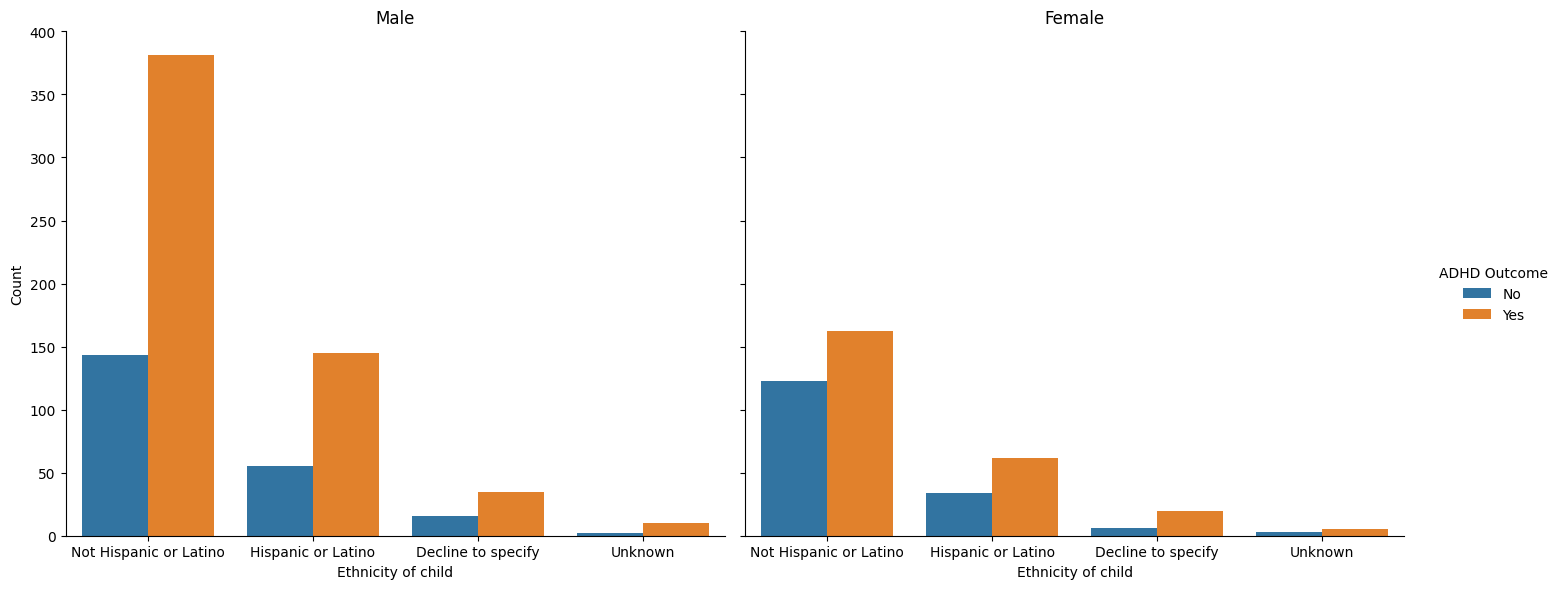

In [31]:
df = cat_y_train.groupby(['PreInt_Demos_Fam_Child_Ethnicity', 'Sex_F'])['ADHD_Outcome'].value_counts().reset_index(name='Counts')

g = sns.catplot(
    data=df,
    x='PreInt_Demos_Fam_Child_Ethnicity',
    y='Counts',
    hue='ADHD_Outcome',
    col='Sex_F',
    kind='bar',
    height=6,
    aspect=1.2
)

# Customize the titles for each subplot
new_titles = {0: 'Male', 1: 'Female'}
for ax, sex_f in zip(g.axes.flat, new_titles.keys()):
    ax.set_title(new_titles[sex_f])

# Customize the legend title and labels
g._legend.set_title('ADHD Outcome')
new_labels = ['No', 'Yes']
for t, label in zip(g._legend.texts, new_labels):
    t.set_text(label)

# Set custom x-tick labels
xticks = ['Not Hispanic or Latino', 'Hispanic or Latino', 'Decline to specify', 'Unknown']
for ax in g.axes.flat:
    ax.set_xticklabels(xticks)

# Update axis labels and layout
g.set_axis_labels('Ethnicity of child', 'Count')

g.tight_layout()
plt.show()

<ipython-input-33-8b5429009227>:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks, rotation=45, ha='right')
<ipython-input-33-8b5429009227>:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks, rotation=45, ha='right')


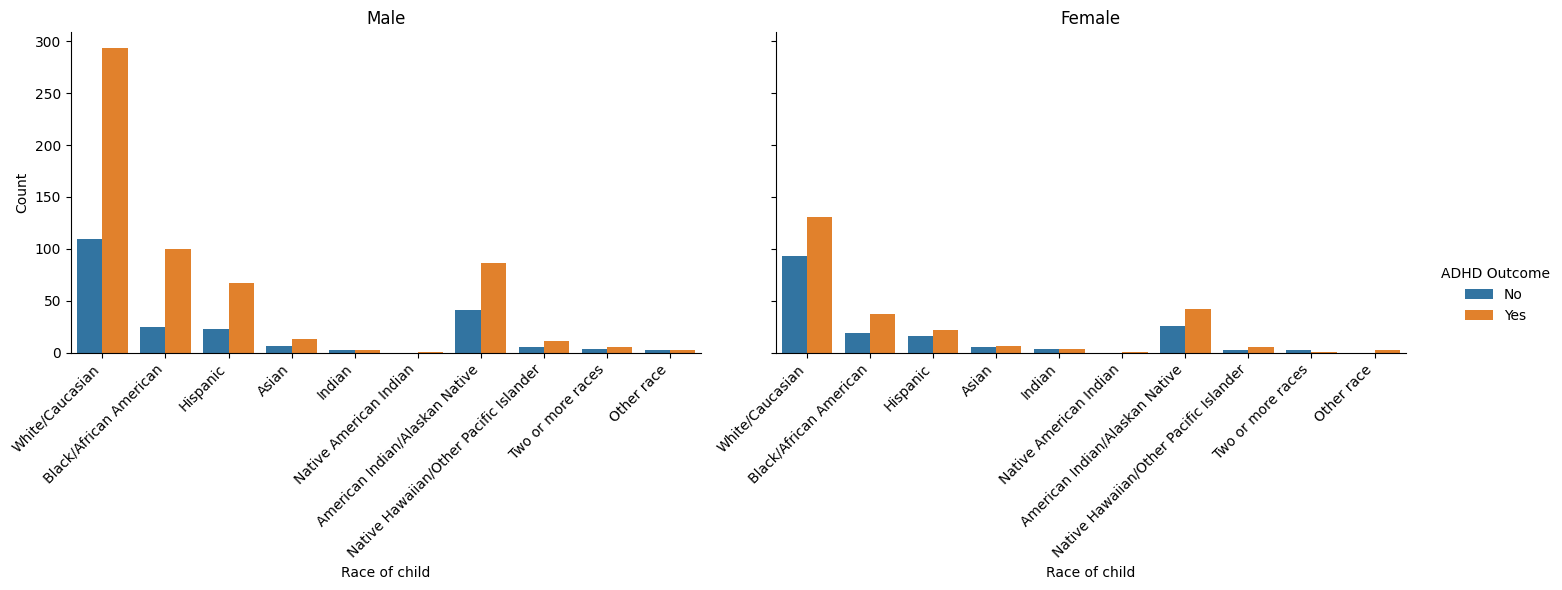

In [33]:
df = cat_y_train.groupby(['PreInt_Demos_Fam_Child_Race', 'Sex_F'])['ADHD_Outcome'].value_counts().reset_index(name='Counts')

g = sns.catplot(
    data=df,
    x='PreInt_Demos_Fam_Child_Race',
    y='Counts',
    hue='ADHD_Outcome',
    col='Sex_F',
    kind='bar',
    height=6,
    aspect=1.2
)

# Customize the titles for each subplot
new_titles = {0: 'Male', 1: 'Female'}
for ax, sex_f in zip(g.axes.flat, new_titles.keys()):
    ax.set_title(new_titles[sex_f])

# Customize the legend title and labels
g._legend.set_title('ADHD Outcome')
new_labels = ['No', 'Yes']
for t, label in zip(g._legend.texts, new_labels):
    t.set_text(label)

# Set custom x-tick labels
xticks = [
    "White/Caucasian",
    "Black/African American",
    "Hispanic",
    "Asian",
    "Indian",
    "Native American Indian",
    "American Indian/Alaskan Native",
    "Native Hawaiian/Other Pacific Islander",
    "Two or more races",
    "Other race",
    "Unknown",
    "Choose not to specify"
]
for ax in g.axes.flat:
    ax.set_xticklabels(xticks, rotation=45, ha='right')

# Update axis labels and layout
g.set_axis_labels('Race of child', 'Count')

g.tight_layout()
plt.show()

#### MRI Info

<ipython-input-35-1c79273c2360>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks)
<ipython-input-35-1c79273c2360>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks)


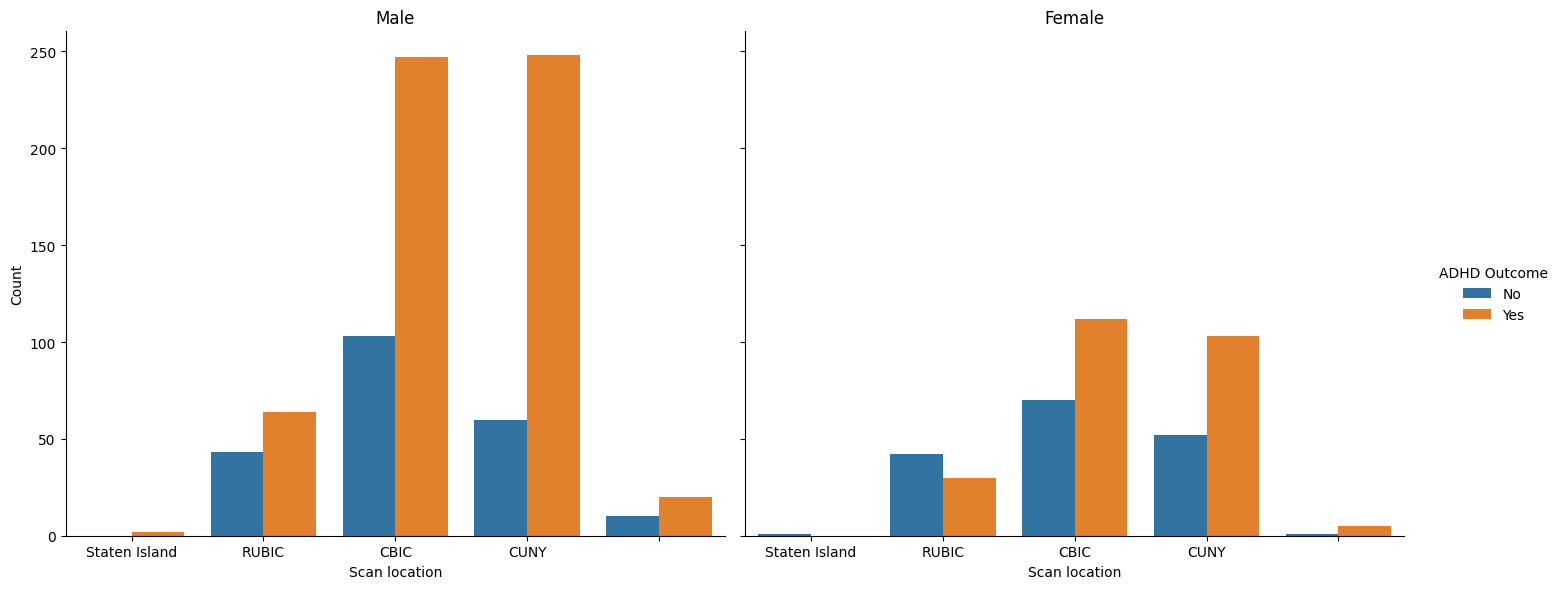

In [35]:
df = cat_y_train.groupby(['MRI_Track_Scan_Location', 'Sex_F'])['ADHD_Outcome'].value_counts().reset_index(name='Counts')

g = sns.catplot(
    data=df,
    x='MRI_Track_Scan_Location',
    y='Counts',
    hue='ADHD_Outcome',
    col='Sex_F',
    kind='bar',
    height=6,
    aspect=1.2
)

# Customize the titles for each subplot
new_titles = {0: 'Male', 1: 'Female'}
for ax, sex_f in zip(g.axes.flat, new_titles.keys()):
    ax.set_title(new_titles[sex_f])

# Customize the legend title and labels
g._legend.set_title('ADHD Outcome')
new_labels = ['No', 'Yes']
for t, label in zip(g._legend.texts, new_labels):
    t.set_text(label)

# Set custom x-tick labels
xticks = ['Staten Island','RUBIC','CBIC', 'CUNY']
for ax in g.axes.flat:
    ax.set_xticklabels(xticks)

# Update axis labels and layout
g.set_axis_labels('Scan location', 'Count')

g.tight_layout()
plt.show()

#### Social status

3=Less than 7th grade

6=Junior high/Middle school (9th grade)

9=Partial high school (10th or 11th grade)

12=High school graduate

15=Partial college (at least one year)

18=College education

21=Graduate degree

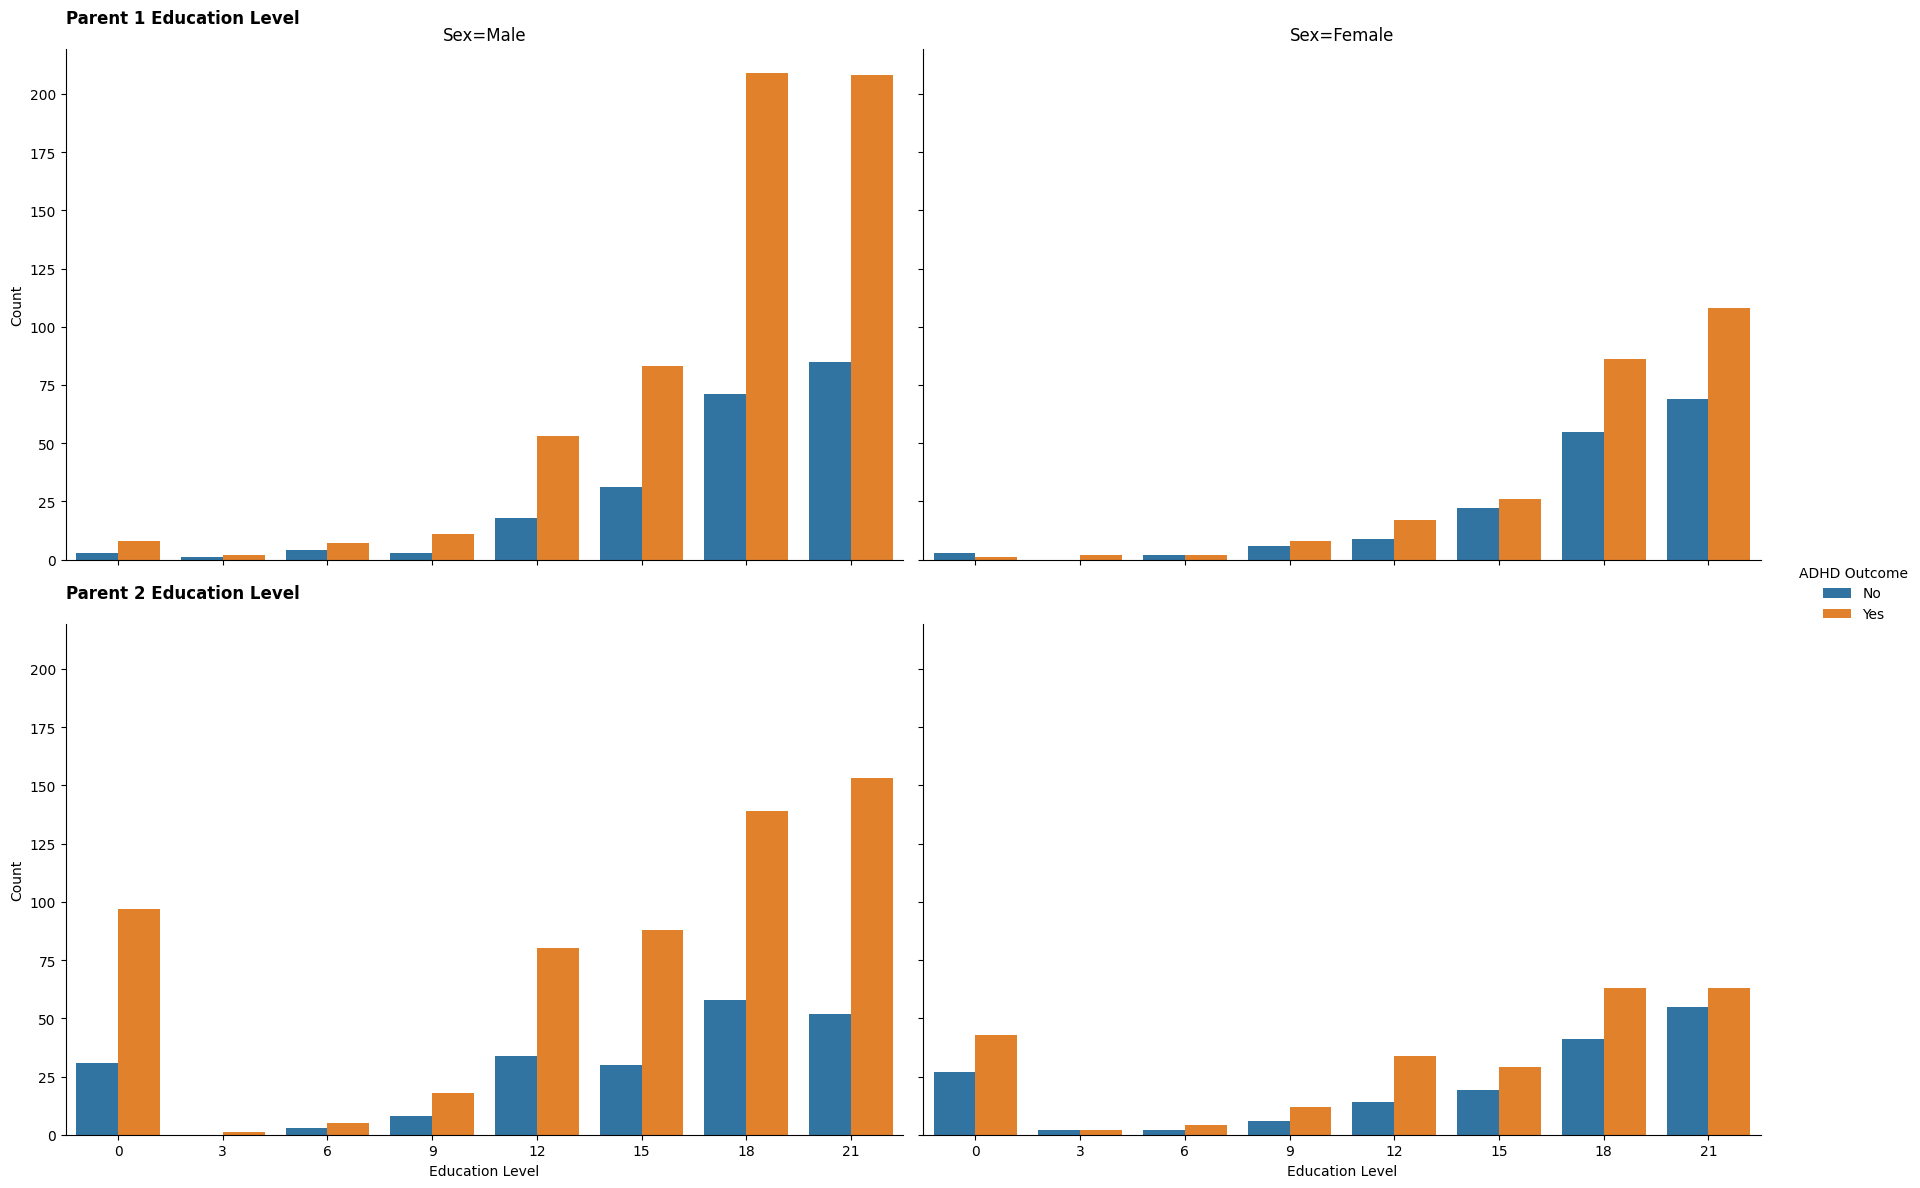

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine Parent 1 and Parent 2 education levels into a single DataFrame
df_p1 = cat_y_train.groupby(['Barratt_Barratt_P1_Edu', 'Sex_F'])['ADHD_Outcome'].value_counts().reset_index(name='Counts')
df_p1['Parent'] = 'Parent 1'  # Add a column to indicate Parent 1

df_p2 = cat_y_train.groupby(['Barratt_Barratt_P2_Edu', 'Sex_F'])['ADHD_Outcome'].value_counts().reset_index(name='Counts')
df_p2['Parent'] = 'Parent 2'  # Add a column to indicate Parent 2

# Rename columns for consistency and concatenate
df_combined = pd.concat([
    df_p1.rename(columns={'Barratt_Barratt_P1_Edu': 'Education_Level'}),
    df_p2.rename(columns={'Barratt_Barratt_P2_Edu': 'Education_Level'})
])

# Plot using Seaborn's catplot
g = sns.catplot(
    data=df_combined,
    x='Education_Level',
    y='Counts',
    hue='ADHD_Outcome',
    col='Sex_F',
    row='Parent',  # Add rows for Parent 1 and Parent 2
    kind='bar',
    height=6,
    aspect=1.5
)

# Customize subplot titles for Sex_F
new_titles = {0: 'Male', 1: 'Female'}
for ax, sex_f in zip(g.axes[0], new_titles.keys()):
    ax.set_title(f"Sex={new_titles[sex_f]}")
for ax, sex_f in zip(g.axes[1], new_titles.keys()):
    ax.set_title("")

# Add labels to clarify row titles for Parent 1 and Parent 2
for i, parent_label in enumerate(['Parent 1 Education Level', 'Parent 2 Education Level']):
    g.axes[i][0].text(
        -0.5,  # X-coordinate (adjust for visibility)
        g.axes[i][0].get_ylim()[1] * 1.05,  # Y-coordinate above the plot
        parent_label,
        fontsize=12,
        fontweight='bold',
        color='black',
        ha='left'
    )

# Customize the legend title and labels
g._legend.set_title('ADHD Outcome')
new_labels = ['No', 'Yes']  # Replace with your labels
for t, label in zip(g._legend.texts, new_labels):
    t.set_text(label)

# Update axis labels and layout
g.set_axis_labels('Education Level', 'Count')
g.tight_layout()
plt.show()

0=Homemaker, stay at home parent.

5=Day laborer, janitor, house cleaner, farm worker, food counter sales, food preparation worker, busboy.

10=Garbage collector, short-order cook, cab driver, shoe sales, assembly line workers, masons, baggage porter.

15=Painter, skilled construction trade, sales clerk, truck driver, cook, sales counter or general office clerk.

20=Automobile mechanic, typist, locksmith, farmer, carpenter, receptionist, construction laborer, hairdresser.

25=Machinist, musician, bookkeeper, secretary, insurance sales, cabinet maker, personnel specialist, welder.

30=Supervisor, librarian, aircraft mechanic, artist and artisan, electrician, administrator, military enlisted personnel, buyer.

35=Nurse, skilled technician, medical technician, counselor, manager, police and fire personnel, financial manager, physical, occupational, speech therapist.

40=Mechanical, nuclear, and electrical engineer, educational administrator, veterinarian, military officer, elementary, high school and special education teacher.

45=Physician, attorney, professor, chemical and aerospace engineer, judge, CEO, senior manager, public official, psychologist, pharmacist, accountant.

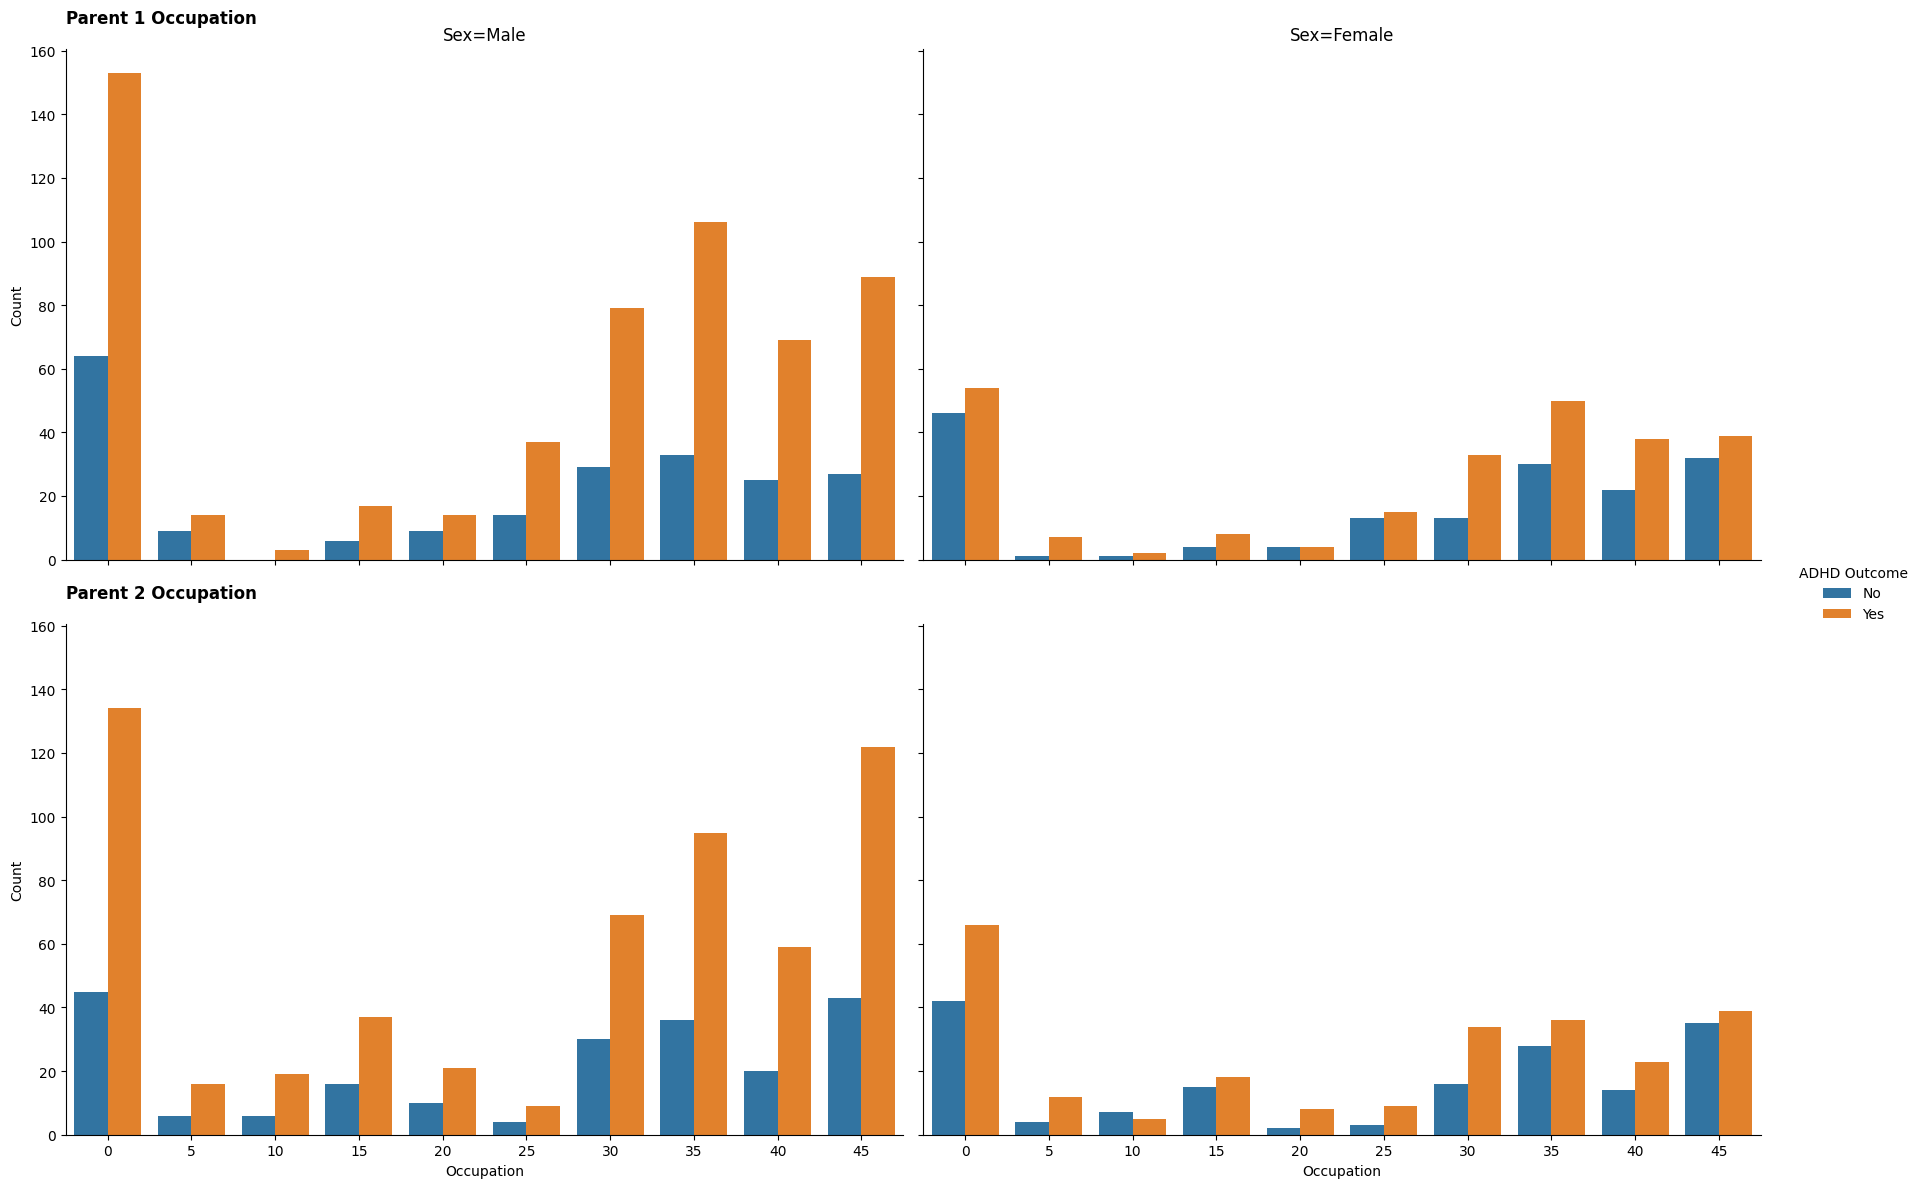

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine Parent 1 and Parent 2 education levels into a single DataFrame
df_p1 = cat_y_train.groupby(['Barratt_Barratt_P1_Occ', 'Sex_F'])['ADHD_Outcome'].value_counts().reset_index(name='Counts')
df_p1['Parent'] = 'Parent 1'  # Add a column to indicate Parent 1

df_p2 = cat_y_train.groupby(['Barratt_Barratt_P2_Occ', 'Sex_F'])['ADHD_Outcome'].value_counts().reset_index(name='Counts')
df_p2['Parent'] = 'Parent 2'  # Add a column to indicate Parent 2

# Rename columns for consistency and concatenate
df_combined = pd.concat([
    df_p1.rename(columns={'Barratt_Barratt_P1_Occ': 'Occupation'}),
    df_p2.rename(columns={'Barratt_Barratt_P2_Occ': 'Occupation'})
])

# Plot using Seaborn's catplot
g = sns.catplot(
    data=df_combined,
    x='Occupation',
    y='Counts',
    hue='ADHD_Outcome',
    col='Sex_F',
    row='Parent',  # Add rows for Parent 1 and Parent 2
    kind='bar',
    height=6,
    aspect=1.5
)

# Customize subplot titles for Sex_F
new_titles = {0: 'Male', 1: 'Female'}
for ax, sex_f in zip(g.axes[0], new_titles.keys()):
    ax.set_title(f"Sex={new_titles[sex_f]}")
for ax, sex_f in zip(g.axes[1], new_titles.keys()):
    ax.set_title("")

# Add labels to clarify row titles for Parent 1 and Parent 2
for i, parent_label in enumerate(['Parent 1 Occupation', 'Parent 2 Occupation']):
    g.axes[i][0].text(
        -0.5,  # X-coordinate (adjust for visibility)
        g.axes[i][0].get_ylim()[1] * 1.05,  # Y-coordinate above the plot
        parent_label,
        fontsize=12,
        fontweight='bold',
        color='black',
        ha='left'
    )

# Customize the legend title and labels
g._legend.set_title('ADHD Outcome')
new_labels = ['No', 'Yes']  # Replace with your labels
for t, label in zip(g._legend.texts, new_labels):
    t.set_text(label)

# Update axis labels and layout
g.set_axis_labels('Occupation', 'Count')
g.tight_layout()
plt.show()

### Functional Connectome

In [51]:
fcm_train.loc[0]

,0
participant_id,70z8Q2xdTXM3
0throw_1thcolumn,0.093473
0throw_2thcolumn,0.146902
0throw_3thcolumn,0.067893
0throw_4thcolumn,0.015141
...,...
196throw_198thcolumn,0.112646
196throw_199thcolumn,-0.05898
197throw_198thcolumn,0.028228
197throw_199thcolumn,0.133582


<ipython-input-97-5b85d7f832a5>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  id, fcm = fcm[0], fcm[1:]


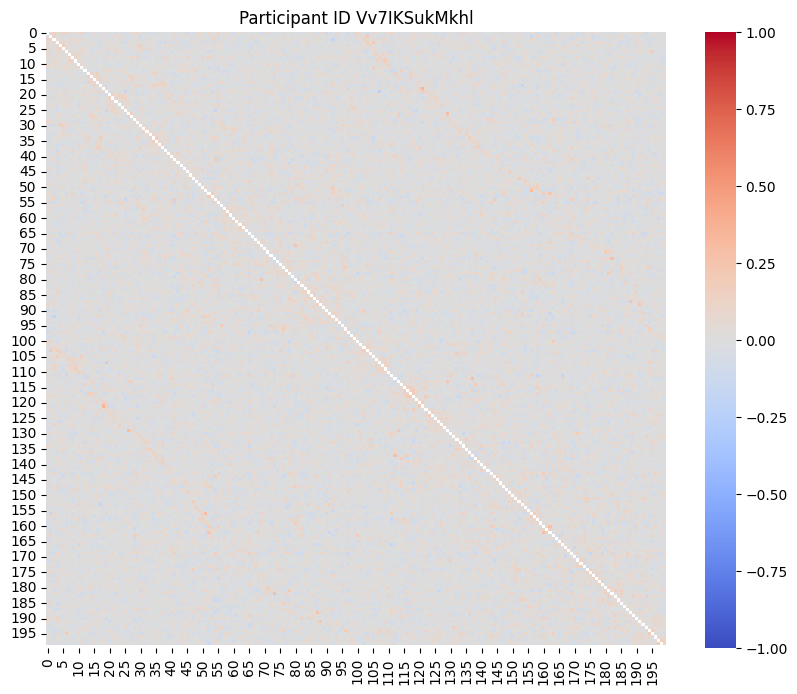

In [97]:
# 0th row has 199 columns; 1th row has 198 columns; ...
# slice 0th row uses [0:199]; slice 1th row uses [199:199+198]
def draw_fc_heatmap(idx, n=199):
    fcm = fcm_train.loc[idx]
    id, fcm = fcm[0], fcm[1:]
    matrix = np.nan * np.empty((n+1, n+1))

    start = 0
    for i in range(n+1):
        # padding left with NaN values
        row = np.concatenate(([np.nan] * (i+1), fcm[start:start+(n-i)]))
        matrix[i] = row
        start += n-i

    # Copy upper triangle to lower triangle
    i_lower = np.tril_indices(n, -1)
    matrix[i_lower] = matrix.T[i_lower]

    plt.figure(figsize = (10,8))
    sns.heatmap(matrix, vmin=-1, vmax=1, cmap = 'coolwarm')
    plt.title(f'Participant ID {id}')
    plt.show()

import random
draw_fc_heatmap(random.randint(0, len(fcm_train)))

## End